## Integrantes:
- Luis Francisco Rodriguez Acevedo

- Desarrollar un modelo de regresión lineal
para la predicción de la masa de mangos
basado una foto
- Usar los descriptores (características) de
imágenes vistas en clase
- Usar herramientas vistas en clase:
umbralización, equalización, operaciones
morfológicas
- Evaluar el modelo con el error absoluto
medio en el “split” de evaluación

## Librerias

In [ ]:
from google.colab.patches import cv2_imshow

## 1. Realiza el filtrado en una imagen primero

In [ ]:
import cv2 as cv

# Leer la imagen en escala de grises
img = cv.imread('/content/drive/MyDrive/Vision_computo/Actividad/MangoMass/images/93a.jpg', cv.IMREAD_GRAYSCALE)

# Aplicar umbralización de Otsu
ret, th = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# Mostrar la imagen binarizada
cv2_imshow(th)

In [ ]:
import cv2
# Calculate the moments of the image
M = cv2.moments(th)
# Calculate the centroid coordinates
centroid_x = int(M["m10"] / M["m00"])
centroid_y = int(M["m01"] / M["m00"])
# Hu moments
# Calculate Hu Moments
hu = cv2.HuMoments(M)
print(hu)
# Calculate the average of Hu Moments
average_hu = sum(hu) / len(hu)

print("Average Hu Moments:", average_hu)

## 2. Se realiza el proceso de preprocesamiento de las imagenes

In [ ]:
import cv2
import numpy as np
from google.colab import drive
import os

# Montar Google Drive para acceder a las imágenes
drive.mount('/content/drive')

# Ruta al directorio que contiene las imágenes
images_dir = '/content/drive/MyDrive/Vision_computo/Actividad/MangoMass/images'

# Crear un directorio para almacenar las imágenes procesadas
output_dir = '/content/drive/MyDrive/Vision_computo/Clase_7/Filtro'
os.makedirs(output_dir, exist_ok=True)

# Iterar sobre todas las imágenes en el directorio
for filename in os.listdir(images_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Cargar la imagen
        image_path = os.path.join(images_dir, filename)
        img = cv2.imread(image_path)

        # Convertir a escala de grises
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Aplicar filtro de mediana para reducir el ruido
        blurred = cv2.medianBlur(gray, 5)

        # Aplicar umbralización adaptativa
        thresh_adapt = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

        # Aplicar umbralización de Otsu
        _, thresh_otsu = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

        # Combinar los resultados de ambas umbralizaciones
        combined_thresh = cv2.bitwise_or(thresh_adapt, thresh_otsu)

        # Encontrar contornos en la imagen umbralizada combinada
        contours, _ = cv2.findContours(combined_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Crear una imagen de fondo blanco del mismo tamaño que la imagen original
        mask = np.ones_like(gray) * 255

        # Rellenar los contornos con negro en la máscara
        cv2.drawContours(mask, contours, -1, 0, thickness=cv2.FILLED)

        # Guardar la imagen procesada
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, mask)

print("Proceso completado.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Proceso completado.


Se aplica Otsu, Aplicacion de contornos para rellenar la image

## 3. Se saca los valores en este caso los Hu momentos

In [ ]:
import cv2
import os
import pandas as pd
import numpy as np

# Directorio donde se encuentran las imágenes
directory = '/content/drive/MyDrive/Vision_computo/Clase_7/Filtro'

# Lista para almacenar los resultados
results = []

# Iterar sobre los archivos en el directorio
for filename in os.listdir(directory):
    # Ruta completa de la imagen
    filepath = os.path.join(directory, filename)

    # Leer la imagen
    image = cv2.imread(filepath)

    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular los momentos de la imagen
    M = cv2.moments(gray)

    # Calcular las coordenadas del centroide
    centroid_x = int(M["m10"]/M["m00"])
    centroid_y = int(M["m01"]/M["m00"])

    # Calcular Hu Moments
    hu = cv2.HuMoments(M)

    # Almacenar los resultados en la lista
    results.append([filename] + [moment[0] for moment in hu])

print(results)

[['256b.jpg', 0.0009501400063912017, 9.32144018115506e-08, 9.019636033098228e-14, 1.4523600318797687e-12, 4.868023141476799e-25, 3.77073265899867e-16, 1.98351270610343e-25], ['224a.jpg', 0.0009551962349369889, 9.413293505960756e-08, 7.407591780646387e-13, 3.5592420951694333e-12, 5.350523682294103e-24, 9.262447433738382e-16, 2.184522714753035e-24], ['138b.jpg', 0.0009639415653871783, 9.320416472853087e-08, 2.803950367208741e-14, 1.093358917429175e-12, 1.0260666638918085e-25, 2.703983428543611e-16, 1.6161860100777619e-25], ['108b.jpg', 0.0012155306392519737, 1.54882899036569e-07, 8.166084337238499e-12, 1.0843678296362118e-11, 3.338782186463836e-23, 1.5094640362969334e-15, -9.642345629618168e-23], ['100a.jpg', 0.0010700844618212382, 1.1573237445912448e-07, 3.6129607922211285e-12, 1.14142383130834e-11, 6.603406190200904e-23, 3.570052313801784e-15, 3.1817361644673776e-23], ['33a.jpg', 0.0009509497554607812, 8.554975359868303e-08, 2.7756987009777814e-13, 1.5956487522506072e-12, 1.03700341797

## 4. se pasa a un excel la lista

In [ ]:
# Convertir la lista a un DataFrame de pandas
df = pd.DataFrame(results, columns=['Name_Image', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7'])

# Guardar el DataFrame en un archivo Excel
excel_file = '/content/drive/MyDrive/Vision_computo/Clase_7/datos.xlsx'
df.to_excel(excel_file, index=False)

## 5. Unir excel

In [ ]:
import pandas as pd

# Leer los archivos CSV y Excel
datos_xlsx = pd.read_excel('/content/drive/MyDrive/Vision_computo/Clase_7/datos.xlsx')
datos_csv = pd.read_csv('/content/drive/MyDrive/Vision_computo/Clase_7/Harumanis_mango_weight.csv')

# Fusionar los DataFrames en función de la columna 'Name_Image' y 'no'
datos_fusionados = pd.merge(datos_xlsx, datos_csv[['no', 'weight']], left_on='Name_Image', right_on='no', how='left')

# Eliminar la columna 'no' ya que no es necesaria
datos_fusionados.drop(columns=['no'], inplace=True)

# Guardar el DataFrame fusionado como un nuevo archivo Excel
datos_fusionados.to_excel('/content/drive/MyDrive/Vision_computo/Clase_7/datos_actualizados.xlsx', index=False)


## Primer modelo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo Excel
df = pd.read_excel('/content/drive/MyDrive/Vision_computo/Clase_7/datos_actualizados.xlsx')
df.dropna(inplace=True)
# Extraer las variables independientes (X) y la variable dependiente (y)
X = df[['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7']].values
y = df['weight'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=19)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 0.0013781751903996914
Coeficiente de Determinación (R^2): 0.8526397788861124


## Segundo modelo

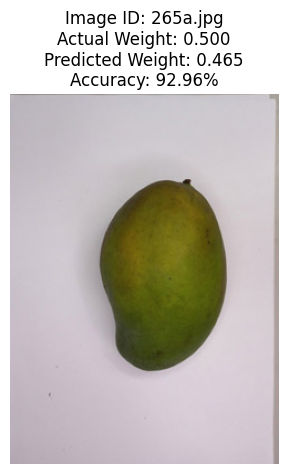

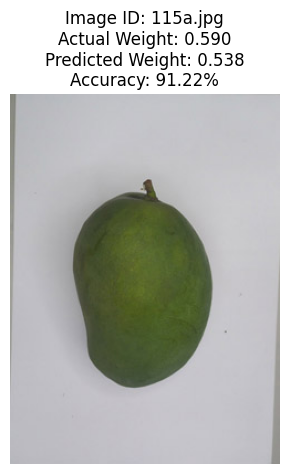

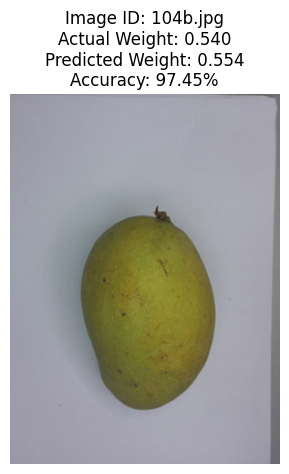

In [ ]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Cargar los datos desde el archivo Excel
data_path = '/content/drive/MyDrive/Vision_computo/Clase_7/datos_actualizados.xlsx'
df = pd.read_excel(data_path)

# Eliminar filas con valores nulos
df.dropna(inplace=True)

# Separar las características (X) y la variable objetivo (y)
X = df[['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7']]
y = df['weight']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=10)

# Escalar las características de entrenamiento para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Guardar el modelo entrenado en un archivo
model_filename = 'linear_regression_model.pkl'
joblib.dump((model, scaler), model_filename)

# Seleccionar tres imágenes aleatorias de la carpeta de imágenes
images_path = '/content/drive/MyDrive/Vision_computo/Actividad/MangoMass/images'
image_ids = df['Name_Image'].tolist()
random_image_ids = random.sample(image_ids, 3)

for random_image_id in random_image_ids:
    # Encontrar la fila correspondiente al Image ID seleccionado
    selected_row = df[df['Name_Image'] == random_image_id]

    # Extraer las características X para la imagen seleccionada
    X_selected = selected_row[['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7']]

    # Escalar las características de la imagen seleccionada utilizando el mismo scaler de entrenamiento
    X_selected_scaled = scaler.transform(X_selected)

    # Realizar la predicción del peso para la imagen seleccionada
    predicted_weight = model.predict(X_selected_scaled)[0]
    actual_weight = selected_row['weight'].values[0]

    # Calcular la precisión en términos porcentuales
    accuracy = 100 * (1 - abs(actual_weight - predicted_weight) / actual_weight)

    # Redondear el valor predicho a tres decimales y completar con ceros
    predicted_weight_rounded = "{:.3f}".format(predicted_weight)

    # Redondear el valor real de peso a tres decimales y completar con ceros
    actual_weight_rounded = "{:.3f}".format(actual_weight)

    # Cargar y mostrar la imagen seleccionada
    image_filename = selected_row['Name_Image'].values[0]  # Suponiendo que 'Image ID' es el nombre de la columna que contiene los nombres de archivo de las imágenes
    image_path = os.path.join(images_path, image_filename)
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(f"Image ID: {random_image_id}\nActual Weight: {actual_weight_rounded}\nPredicted Weight: {predicted_weight_rounded}\nAccuracy: {accuracy:.2f}%")
    plt.axis('off')
    plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Escalar las características de prueba utilizando el mismo scaler de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.0020120177238820264
R-squared (R²): 0.826814894599046


## Tercer modelo

In [ ]:
import cv2
import os
import pandas as pd
import numpy as np

# Directorio donde se encuentran las imágenes
directory = '/content/drive/MyDrive/Vision_computo/Clase_7/Filtro'

# Diccionario para almacenar los resultados
results_dict = {}

# Iterar sobre los archivos en el directorio
for filename in os.listdir(directory):
    # Ruta completa de la imagen
    filepath = os.path.join(directory, filename)

    # Leer la imagen
    image = cv2.imread(filepath)

    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular los momentos de la imagen
    M = cv2.moments(gray)

    # Calcular Hu Moments
    hu = cv2.HuMoments(M)

    # Almacenar los resultados en el diccionario
    results_dict[filename] = [moment[0] for moment in hu]

print(results_dict)


{'256b.jpg': [0.0009501400063912017, 9.32144018115506e-08, 9.019636033098228e-14, 1.4523600318797687e-12, 4.868023141476799e-25, 3.77073265899867e-16, 1.98351270610343e-25], '224a.jpg': [0.0009551962349369889, 9.413293505960756e-08, 7.407591780646387e-13, 3.5592420951694333e-12, 5.350523682294103e-24, 9.262447433738382e-16, 2.184522714753035e-24], '138b.jpg': [0.0009639415653871783, 9.320416472853087e-08, 2.803950367208741e-14, 1.093358917429175e-12, 1.0260666638918085e-25, 2.703983428543611e-16, 1.6161860100777619e-25], '108b.jpg': [0.0012155306392519737, 1.54882899036569e-07, 8.166084337238499e-12, 1.0843678296362118e-11, 3.338782186463836e-23, 1.5094640362969334e-15, -9.642345629618168e-23], '100a.jpg': [0.0010700844618212382, 1.1573237445912448e-07, 3.6129607922211285e-12, 1.14142383130834e-11, 6.603406190200904e-23, 3.570052313801784e-15, 3.1817361644673776e-23], '33a.jpg': [0.0009509497554607812, 8.554975359868303e-08, 2.7756987009777814e-13, 1.5956487522506072e-12, 1.03700341797

In [ ]:
import pandas as pd

# Nombre del archivo CSV
csv_file = '/content/drive/MyDrive/Vision_computo/Clase_7/Harumanis_mango_weight.csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(csv_file)

# Crear el diccionario a partir del DataFrame
data_dict = df.set_index('no')['weight'].to_dict()

print(data_dict)


{'1a.jpg': 0.5, '2a.jpg': 0.5, '3a.jpg': 0.35, '4a.jpg': 0.45, '5a.jpg': 0.5, '6a.jpg': 0.4, '7a.jpg': 0.7, '8a.jpg': 0.45, '9a.jpg': 0.3, '10a.jpg': 0.3, '11a.jpg': 0.4, '12a.jpg': 0.35, '13a.jpg': 0.3, '14a.jpg': 0.5, '15a.jpg': 0.5, '16a.jpg': 0.3, '17a.jpg': 0.35, '18a.jpg': 0.35, '19a.jpg': 0.5, '20a.jpg': 0.4, '21a.jpg': 0.4, '22a.jpg': 0.3, '23a.jpg': 0.35, '24a.jpg': 0.4, '25a.jpg': 0.35, '26a.jpg': 0.3, '27a.jpg': 0.35, '28a.jpg': 0.35, '29a.jpg': 0.4, '30a.jpg': 0.35, '31a.jpg': 0.4, '32a.jpg': 0.25, '33a.jpg': 0.35, '34a.jpg': 0.3, '35a.jpg': 0.3, '36a.jpg': 0.4, '37a.jpg': 0.45, '38a.jpg': 0.4, '39a.jpg': 0.35, '40a.jpg': 0.4, '41a.jpg': 0.35, '42a.jpg': 0.5, '43a.jpg': 0.4, '44a.jpg': 0.3, '45a.jpg': 0.55, '46a.jpg': 0.35, '47a.jpg': 0.45, '48a.jpg': 0.45, '49a.jpg': 0.35, '50a.jpg': 0.5, '51a.jpg': 0.5, '52a.jpg': 0.35, '53a.jpg': 0.4, '54a.jpg': 0.45, '55a.jpg': 0.3, '56a.jpg': 0.5, '57a.jpg': 0.35, '58a.jpg': 0.45, '59a.jpg': 0.45, '60a.jpg': 0.4, '61a.jpg': 0.5, '62a.j

In [ ]:
# Combinar los dos diccionarios
combined_dict = {}

# Iterar sobre las claves de uno de los diccionarios (por ejemplo, results_dict)
for key in results_dict:
    # Verificar si la clave existe en el otro diccionario (data_dict)
    if key in data_dict:
        # Si la clave existe en ambos diccionarios, asignar el valor de data_dict como la clave y el valor de results_dict como el valor en el nuevo diccionario
        combined_dict[data_dict[key]] = results_dict[key]

print(combined_dict)


{0.4: [0.0010043291300780958, 9.913482167349647e-08, 1.778786285313608e-13, 6.862464527583344e-13, 2.3948079226209307e-25, 1.812296727403003e-16, -1.1628303884637588e-26], 0.43: [0.0009540416419017504, 8.529780985151268e-08, 2.7255356629248565e-13, 2.6220140484822928e-12, 2.210560661797318e-24, 7.64797679211615e-16, 1.6289984239997996e-25], 0.68: [0.0011647761382888916, 1.2823277979571307e-07, 1.361263581072847e-11, 3.7418272652824235e-11, 7.79373463294193e-22, 1.3048994116101273e-14, 3.2518856770687905e-22], 0.54: [0.001059707339668964, 1.0824689715039182e-07, 4.6099667975456086e-14, 4.3976713820179254e-13, 4.1600292636464226e-26, 1.4436876419695246e-16, 4.679891309265396e-26], 0.35: [0.000935124363254892, 8.952700293552408e-08, 1.4875212491268432e-13, 6.883526206211773e-13, 2.1013923068623846e-25, 1.20430255257303e-16, -6.602078386855153e-26], 0.3: [0.0009331482329699843, 8.682839133495587e-08, 1.9795622854690946e-13, 1.1086978413362198e-12, 5.091897959260358e-25, 2.856474900766492e-

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Convertir el diccionario en listas separadas para X y Y
X = []
Y = []
for key, value in combined_dict.items():
    Y.append(key)
    X.append(value)

# Convertir las listas en matrices de numpy para que coincidan con la entrada del modelo de regresión lineal
X = np.array(X)
Y = np.array(Y)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, Y)

# Imprimir los coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)

# Imprimir el intercepto del modelo
print("Intercepto del modelo:", modelo.intercept_)



Coeficientes del modelo: [ 1.72347636e+03 -1.28558560e+06 -1.18919388e+10  8.48731699e+09
 -4.36941186e+05 -1.37530113e+13  4.50595224e+05]
Intercepto del modelo: -1.154861529273616


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que tienes un diccionario llamado 'data_dict' donde las claves son los valores de Y y los valores son listas de X

# Ejemplo de diccionario 'data_dict'

# Convertir el diccionario en listas separadas para X y Y
X = []
Y = []
for key, value in combined_dict.items():
    Y.append(key)
    X.append(value)

# Convertir las listas en matrices de numpy para que coincidan con la entrada del modelo de regresión lineal
X = np.array(X)
Y = np.array(Y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=19)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 0.0015953441071953174
Coeficiente de Determinación (R^2): 0.7163832698319437
